
=== INICIANDO PROCESO DE LIMPIEZA E IMPUTACIÓN ===

Datos cargados desde D:/Proyectos Personales ML/Entrenamientos ML/BITCOIN/Bitcoin_2011_2017.csv
Dimensiones: (2557, 7)
Primeras filas:
         Date     Price      Open      High       Low     Vol. Change %
0  2017-12-31  13,850.4  12,532.4  14,241.8  12,359.4  111.27K   10.52%
1  2017-12-30  12,531.5  14,392.1  14,461.5  11,962.1  182.07K  -12.93%
2  2017-12-29  14,392.6  14,398.5  15,109.8  13,951.1  118.88K   -0.04%
3  2017-12-28  14,398.7  15,416.3  15,505.5  13,466.1  170.37K   -6.60%
4  2017-12-27  15,416.6  15,757.0  16,514.6  14,534.7  138.71K   -2.16%

Tipos de datos:
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object
Columna 'Date' convertida a datetime y establecida como índice
DataFrame ordenado por fecha (descendente)
Columna 'Price' convertida a numérica
Columna 'Open' convertida a numérica
Columna 'High' convertida a numéric

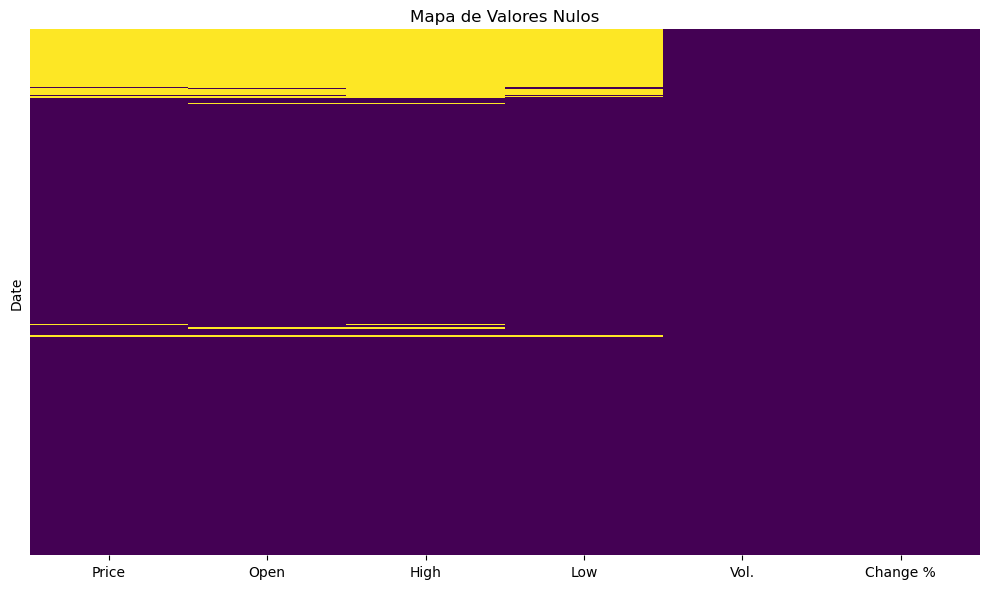


Aplicando método de imputación combinado...
Después de interpolación, quedan valores nulos:
Price    297
Open     296
High     317
Low      275
dtype: int64
Valores nulos después de imputación: 0


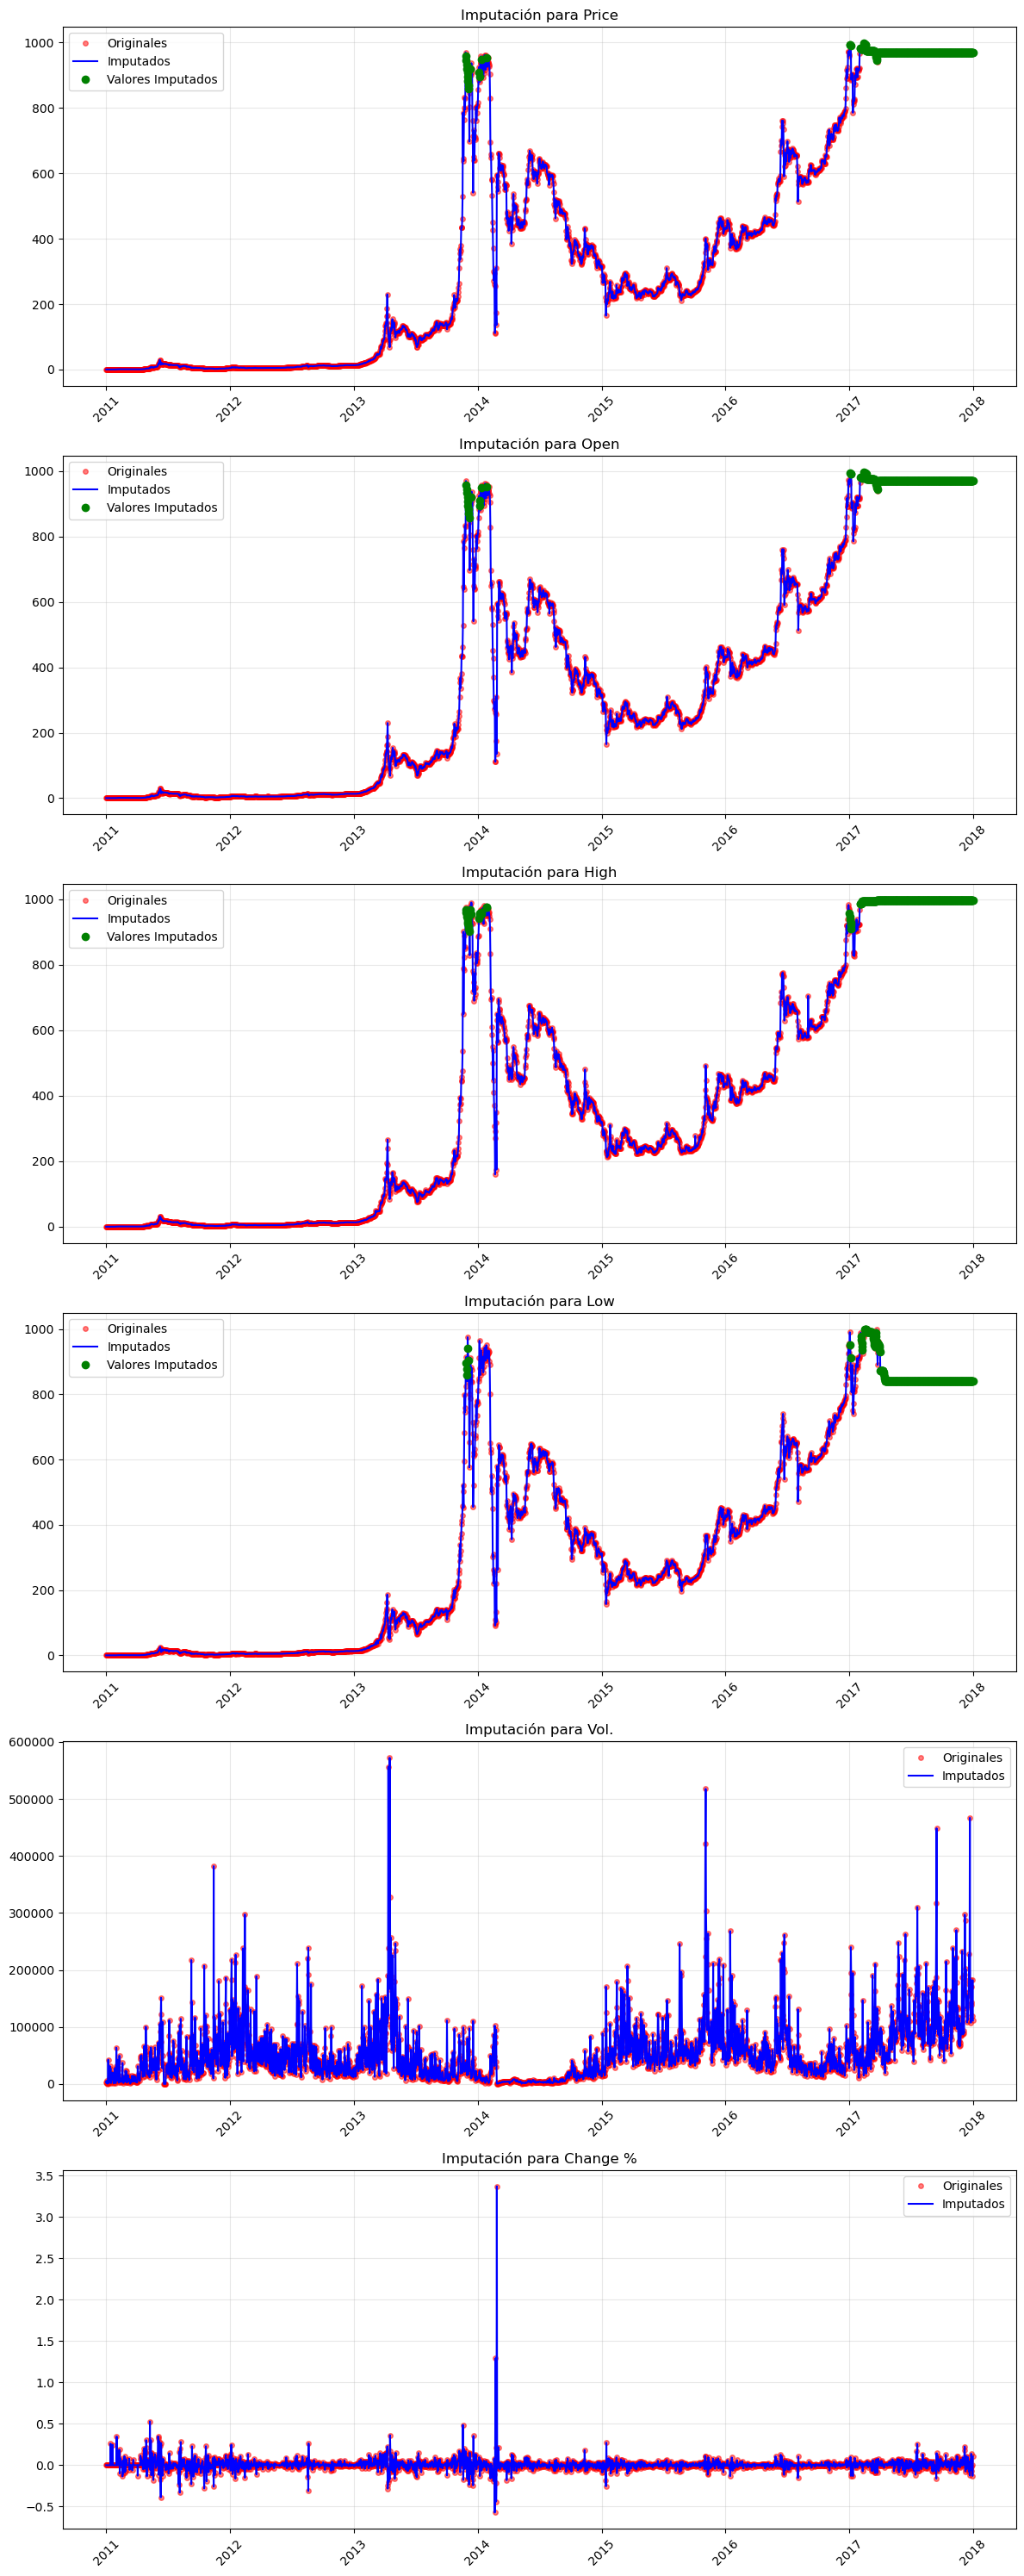


Datos limpios guardados en D:/Proyectos Personales ML/Entrenamientos ML/BITCOIN/Bitcoin_2011_2017_Clean.csv
Dimensiones finales: (2557, 6)

=== PROCESO DE LIMPIEZA E IMPUTACIÓN COMPLETADO ===

DataFrame original: (2557, 6) filas y columnas
Columnas disponibles: ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
No se encontraron valores nulos en el dataset.

Pares de features con alta correlación (>0.8):
Price y Open: 0.9985
Price y High: 0.9991
Price y Low: 0.9956
Open y High: 0.9987
Open y Low: 0.9948
High y Low: 0.9939

Columnas eliminadas por alta correlación: {'High', 'Low', 'Open'}
Se escalaron 2 columnas numéricas.
DataFrame procesado: (2557, 3) filas y columnas


In [5]:
import sys
import os
sys.path.append(os.path.abspath('../..'))

from src.bitcoin_data_cleaner import BitcoinDataCleaner

# Crear instancia
cleaner = BitcoinDataCleaner(verbose=True)

# Ejecutar pipeline completo
input_file = "D:/Proyectos Personales ML/Entrenamientos ML/BITCOIN/Bitcoin_2011_2017.csv"
output_file = "D:/Proyectos Personales ML/Entrenamientos ML/BITCOIN/Bitcoin_2011_2017_Clean.csv"
clean_df = cleaner.clean_data_pipeline(input_file, output_file)

# Ahora puedes continuar con el preprocesamiento
from src.bitcoin_preprocessor import BitcoinPreprocessor
preprocessor = BitcoinPreprocessor(
    remove_high_corr=True,
    corr_threshold=0.8,
    scale_features=True,
    ensure_stationarity=False,
    target_col='Price'  # O la columna que uses como target
)

# Aplicar preprocessor al dataset limpio
processed_df = preprocessor.fit_transform(clean_df)